<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Data Analysis of Singapore Rainfall

--- 
# Part 1

---

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis and Data Visualisation](#Exploratory-Data-Analysis-and-Data-Visualisation)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

According to the [Meteorological Services Singapore](http://www.weather.gov.sg/climate-climate-of-singapore/#:~:text=Singapore%20is%20situated%20near%20the,month%2Dto%2Dmonth%20variation.), Singapore has a typical tropical climate with adundant rainfall, high and uniform temperatures and high humidity all year round, since its situated near the equator. There are many factors that help us understand the climate of a country and in this project we are going to look into a few, especially rainfall.

Singapore’s climate is characterised by two main monsoon seasons separated by inter-monsoonal periods.  The **Northeast Monsoon** occurs from December to early March, and the **Southwest Monsoon** from June to September.

The major weather systems affecting Singapore that can lead to heavy rainfall are:

- Monsoon surges, or strong wind episodes in the Northeast Monsoon flow bringing about major rainfall events;

- Sumatra squalls, an organised line of thunderstorms travelling eastward across Singapore, having developed over the island of Sumatra or Straits of Malacca west of us;

- Afternoon and evening thunderstorms caused by strong surface heating and by the sea breeze circulation that develops in the afternoon.

Singapore’s climate station has been located at several different sites in the past 140 years. The station had been decommissioned at various points in the past due to changes to local land use in the site’s vicinity, and had to be relocated. Since 1984, the climate station has been located at **Changi**.

There are other metrics of climate such as temperature, humidity, sun shine duration, wind speed, cloud cover etc. All the dataset used in the project comes from [data.gov.sg](data.gov.sg), as recorded at the Changi climate station 


### Brief explanation of datasets used
#### General information
- All values correspond to **a single month**.
- Total of 480 rows corresponding to 480 months (12 months x 40 years).
- Period: Sep 1982 to Aug 2022.

|Dataset|Description|Unit of Measurement|Source (csv file)|
|---|---|---|---|
|Rainfall - total rainfall|Each value corresponds to the total amount of rainfall for the given month.|mm|rainfall-monthly-total.csv|
|Rainfall - total number of rainy days|Each value corresponds to the number of days it rained in the given month.|N.A. (days)|rainfall-monthly-number-of-rain-days.csv|
|Rainfall - highest daily total|Each value corresponds to the amount of rainfall _for the wettest day_ in the given month.|mm|rainfall-monthly-highest-daily-total.csv|
|Relative humidity - mean|Each value corresponds to the mean relative humidity for the given month.|%|relative-humidity-monthly-mean.csv|
|Surface air temperature - mean|Each value corresponds to the mean surface air temperature for the given month.|°C|surface-air-temperature-monthly-mean.csv|
|Sunshine - mean number of hours (daily)|Each value corresponds to the mean _daily_ number of hours of sunshine for the given month.|hours|sunshine-duration-monthly-mean-daily-duration.csv|

### Problem Statement

Event cancellations in Singapore often occur as a result of adverse weather, more specifically, rain. This poses an issue to People's Association, which plans numerous events to engage Singaporeans from all walks of life. This project aims to analyse and identify monthly weather patterns so that People's Association staff will be able to plan events _around_ the local weather more effectively, thus resulting in fewer event cancellations.

### Outside Research

#### The Northeast Monsoon (Dec - early Mar)

Due to wind, the monsoon rain-belt moves across Asia from north to south. Due to the progressive nature of this phenomenon, the **rainy** season commences during the _inter-monsoon months_, ie. Oct & Nov. By Dec, the rainy season is at its peak. Rainfall tends to be **sustained and prolonged** with several consecutive days experiencing rain.

By late Jan or early Feb, the **dry season** begins although it is _still_ the monsoon season due to the movement of the rain-belt. Since this date is not 'set in stone', the exact start of the dry period varies by year, but it is generally defined as late Jan to early Mar.

Ongoing northeasterly winds can exacerbate dry conditions, thus resulting in Feb & Mar often being the driest months. This is due to convergence & sinking of air arising from the monsoon rain-belt, thus bringing about the formation of a subtropical high pressure belt. This belt makes it difficult for air to rise, and thus prevents rain from being formed. The prevailing northeasterly winds 'blow' the belt to the tropics, thus resulting in extended dry conditions.

#### Sumatra Squalls (often Jun - Sep)

Formed over Sumatra and brought to places like Singapore due to westerly winds. Due to the wind direction required, it often takes place during the Southwest Monsoon period (Jun - Sep). Squall formation requires:
> Convergence of air streams at low levels (height of less than 1 km) over a large area 
They typically begin overnight and reach Singapore around predawn or morning. Singapore then experiences 1 to 2 hours of thundery showers and, occasionally, strong gusts of wind.

#### Sea breeze-induced thunderstorms
Formed when there's a temperature difference between land and sea. Convergence of warmer & cooler air _can_ result in rain, and the larger the difference, the more likely it is to rain. Therefore, theoretically, the ideal period would be hot afternoons.

In reality, rain doesn't always form, because **surface wind** (not sea breeze) exceeding speeds of 15 km/h can _prevent_ formation of sea breezes. Thus, the optimal conditions for rain are as such: **higher temperatures** and **lighter prevailing surface wind**. These conditions arise more frequently during inter-monsoon periods (Late Mar, Apr, Oct, Nov). Rain often commences in the afternoons and may continue into the evenings.

#### Sources:
- https://www.nea.gov.sg/docs/default-source/resource/guidebook-on-climate-of-singapore.pdf
- http://www.weather.gov.sg/climate-climate-of-singapore/

### Coding Challenges

**Note**: the numpy library has been imported for the purposes of _checking_ the code.

In [620]:
# 1. Manual calculation of mean.

def get_mean(vals):
    '''
    Parameters
    vals : list; compulsory; contains values to calculate mean for
    '''
    
    total = 0
    
    for val in vals:
        total += val
        
    mean = total / len(vals)
    
    return mean

In [621]:
# Checking that the get_mean function works as intended.

# Importing a library for the purposes of checking the function.

import numpy as np

num_list = [5, -0.8, 20/3, -2*14.9, 600]

if get_mean(num_list) == np.mean(num_list):
    print(f'Success! Mean of {get_mean(num_list)} has been calculated correctly.')
else:
    print('ERROR! Try again.')

Success! Mean of 116.21333333333334 has been calculated correctly.


In [622]:
# 2. Manual calculation of standard deviation.

def get_std_dev(vals, n_decimals=None):
    '''
    Parameters
    vals : list; compulsory; contains values to calculate mean for
    '''
    
    mean = get_mean(vals)
    
    std_dev_list = []
    
    for val in vals:
        std_dev_list.append((val - mean) ** 2)
    
    std_dev = get_mean(std_dev_list) ** 0.5
    
    return std_dev

In [623]:
# Checking that the get_std_dev function works as intended.

# Numpy is used for the purposes of checking the function.

# Using the same list as the one used in checking the get_mean() function
num_list = [5, -0.8, 20/3, -2*14.9, 600]

if get_std_dev(num_list) == np.std(num_list):
    print(f'Success! Standard deviation of {get_std_dev(num_list)} has been calculated correctly.')
else:
    print('ERROR! Try again.')

Success! Standard deviation of 242.25211256962126 has been calculated correctly.


--- 
# Part 2

---

### Library Imports

In [624]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

%matplotlib inline

## Data Import and Cleaning

### Importing Data & Checking for Errors / Issues

1. Reading the data.
2. Getting a 'gist' of each dataset by checking the first 5 rows.
3. Checking each dataset for null values.
4. Checking the number of rows & columns for each dataset.
5. Checking the dtypes of values in each column for each dataset.

In [625]:
# 1. Reading 6 climate-related monthly datasets.

rain_max_in_day_monthly = pd.read_csv('../data/rainfall-monthly-highest-daily-total.csv')

rain_days_monthly = pd.read_csv('../data/rainfall-monthly-number-of-rain-days.csv')

rain_total_monthly = pd.read_csv('../data/rainfall-monthly-total.csv')

humidity_mean_monthly = pd.read_csv('../data/relative-humidity-monthly-mean.csv')

sunshine_daily_mean_monthly = pd.read_csv('../data/sunshine-duration-monthly-mean-daily-duration.csv')

temp_mean_monthly = pd.read_csv('../data/surface-air-temperature-monthly-mean.csv')

In [626]:
# Placing dataset names into a list for simplicity.

df_all = [rain_max_in_day_monthly,
          rain_days_monthly,
          rain_total_monthly,
          humidity_mean_monthly,
          sunshine_daily_mean_monthly,
          temp_mean_monthly]

In [627]:
# 2. Displaying the first 5 rows of each dataset.

for df in df_all:
    display(df.head())

,month,maximum_rainfall_in_a_day
0,1982-01,36.5
1,1982-02,9.4
2,1982-03,61.7
3,1982-04,45.1
4,1982-05,33.0


,month,no_of_rainy_days
0,1982-01,10
1,1982-02,5
2,1982-03,11
3,1982-04,14
4,1982-05,10


,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


,month,mean_rh
0,1982-01,81.2
1,1982-02,79.5
2,1982-03,82.3
3,1982-04,85.9
4,1982-05,83.2


,month,mean_sunshine_hrs
0,1982-01,5.6
1,1982-02,7.6
2,1982-03,5.1
3,1982-04,4.7
4,1982-05,5.8


,month,mean_temp
0,1982-01,25.9
1,1982-02,27.1
2,1982-03,27.2
3,1982-04,27.0
4,1982-05,28.0


In [628]:
# 3. Checking each dataset for null values.

for df in df_all:
    
    if df.isnull().sum().sum() != 0:
        print(df.isnull().sum())
        
    else:
        print(f'Null values for {df.columns[-1]}: 0')

Null values for maximum_rainfall_in_a_day: 0
Null values for no_of_rainy_days: 0
Null values for total_rainfall: 0
Null values for mean_rh: 0
Null values for mean_sunshine_hrs: 0
Null values for mean_temp: 0


In [629]:
# 4. Checking the shape of each dataset, in particular the number of rows.

for df in df_all:
    print(f'{df.columns[-1]}:')
    print(f'Number of rows: {df.shape[0]}')
    print(f'Number of columns: {df.shape[1]}')
    print()

maximum_rainfall_in_a_day:
Number of rows: 491
Number of columns: 2

no_of_rainy_days:
Number of rows: 488
Number of columns: 2

total_rainfall:
Number of rows: 488
Number of columns: 2

mean_rh:
Number of rows: 491
Number of columns: 2

mean_sunshine_hrs:
Number of rows: 491
Number of columns: 2

mean_temp:
Number of rows: 491
Number of columns: 2



In [630]:
# 5. Checking dtypes of columns in each dataset.

for df in df_all:
    print(f'Dtypes of {df.columns[-1]}:')
    print(df.dtypes)
    print()

Dtypes of maximum_rainfall_in_a_day:
month                         object
maximum_rainfall_in_a_day    float64
dtype: object

Dtypes of no_of_rainy_days:
month               object
no_of_rainy_days     int64
dtype: object

Dtypes of total_rainfall:
month              object
total_rainfall    float64
dtype: object

Dtypes of mean_rh:
month       object
mean_rh    float64
dtype: object

Dtypes of mean_sunshine_hrs:
month                 object
mean_sunshine_hrs    float64
dtype: object

Dtypes of mean_temp:
month         object
mean_temp    float64
dtype: object



### Rectifying Errors & Issues
- Issues discovered from the previous section:
    - From step 2: some columns have names that are not sufficiently informative.
    - From step 4: number of rows for each dataset are not identical --> period covered by each dataset is not identical.

In [631]:
# Changing column name for the humidity dataset since 'rh' is not very informative.

df_all[3].rename({'mean_rh': 'mean_humidity'}, axis=1, inplace=True, errors='ignore')

In [632]:
# Creating a list that saves the months numerically in str format.
# Will frequently be used for iterating through the months.

month_str = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

In [633]:
# Adjusting range for each dataset to be the same from September 1982 to August 2022 (40 years).

for i in range(len(df_all)):
    
    for month in month_str[:8]:
        
        index = df_all[i][df_all[i].month.str.contains('1982-' + month) == True].index
        df_all[i].drop(labels=index, inplace=True, errors='ignore')
        
    for month in month_str[8:]:
        
        index = df_all[i][df_all[i].month.str.contains('2022-' + month) == True].index
        df_all[i].drop(labels=index, inplace=True, errors='ignore')

In [634]:
# Checking that the above worked.

for i in range(len(df_all)):
    
    start = df_all[i].head(1).month
    end = df_all[i].tail(1).month
    
    if start[start.index[0]] != '1982-09' or end[end.index[0]] != '2022-08':
        print('ERROR! Try again.')
        
else:
    print('Completed.')

Completed.


### Merging Datasets & Further Cleaning

In [635]:
# Merger of the datasets can now be done.

df = pd.merge(left=df_all[0], right=df_all[1])

for i in range(2, (len(df_all))):
    df = df.merge(df_all[i])

In [636]:
# Adding an additional column that reflects the total number of days in any given month.
# This is needed to calculate rainfall rate later.
# Feb is standardised as 28 days for now; leap years will be adjusted for below.

days_in_month = [30, 31, 30, 31, 31, 28, 31, 30, 31, 30, 31, 31] * 40

df['total_days'] = days_in_month

In [637]:
# Adjusting number of days in month to be 29 for February of the following leap years: 1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020

leap_year_feb = [(i + '-02') for i in [str(i) for i in [1984, 1988, 1992, 1996, 2000, 2004, 2008, 2012, 2016, 2020]]]

df.total_days = np.where(df.month.isin(leap_year_feb), 29, df['total_days'])

In [638]:
# Saving cleaned & merged DataFrame as a csv file.

df.to_csv('../data/rainfall_and_other_variables.csv')

### Data Dictionary

|Feature|Type|Dataset|Description|
|---|---|---|---|
|month|_object (str)_|N.A.|Month as 2-digit numbers|
|maximum_rainfall_in_a_day|_float_|rain_max_in_day_monthly|Total rainfall in the wettest day of the month (unit: mm)|
|no_of_rainy_days|_int_|rain_days_monthly|Number of rainy days|
|total_rainfall|_float_|rain_total_monthly|Total rainfall (unit: mm)|
|mean_humidity|_float_|humidity_mean_monthly|Mean relative humidity (unit: %)|
|mean_sunshine_hrs|_float_|sunshine_daily_mean_monthly|Mean number of hours of sunshine|
|mean_temp|_float_|temp_mean_monthly|Mean temperature (unit: °C)|
|total_days|_int_|N.A.|Number of days in the specified month|

## Exploratory Data Analysis and Data Visualisation
    
### Part (A): creating functions for EDA

### Part (B): EDA questions + summary statistics
- Which months had the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?
- Which years had the highest and lowest total rainfall in the date range of analysis?
- Which months had the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?
- Which years had the highest and lowest number of rainy days in the date range of analysis?
- What was the overall rainfall rate?
- Which months had higher or lower rainfall rates?
- How variable were rainfall rates by month?
- How did humidity levels impact rainfall rates?
- How did surface air temperature impact rainfall rate?
- Did sunny days experience higher or lower rainfall rates as compared to cloudier days?
- Were there any outlier months in the dataset?
- Which months had the highest and lowest total rainfall? Does this information affect the way we view rainfall rates?
- Which months have a trend of having high maximum rainfall (a day in the month)? Does this information affect the way we view rainfall rates?
- Does comparing maximum rainfall in a day, total rainfall and number of rainy days provide any further insights?

### Part (C): ending notes

### Part (A): creating functions for EDA

In [639]:
# Saving the number of months as a variable.

n_months = df.shape[0]

In [640]:
# Calculating the total number of days associated with each month over the span of 40 years.

total_days_by_month = {}

for month in month_str:
    
    if month in ['01', '03', '05', '07', '08', '10', '12']:
        total_days_by_month[month] = 31 * 40
        
    # + 10 to account for leap years.
    elif month == '02':
        total_days_by_month[month] = 28 * 40 + 10
        
    else:
        total_days_by_month[month] = 30 * 40

In [641]:
df_cols = list(df.columns)

In [642]:
# Writing a function that obtains the maximum or minimum values from a dataset for a given year and variable.

def get_max_or_min(year='', col='', lowest=True):
    
    df_temp = df[df.month.str.startswith(year)][['month', col]]
    df_temp.sort_values(col, ascending=lowest, inplace=True)
    
    df_dict = {df_temp.month[df_temp.index[0]]: df_temp[col][df_temp.index[0]]}
    
    # Ensuring that tied values are not missed out.
    for i in range(1, len(df_temp.index)):
        
        if df_temp[col][df_temp.index[i]] == df_temp[col][df_temp.index[0]]:
            df_dict[df_temp.month[df_temp.index[i]]] = df_temp[col][df_temp.index[i]]
            
        # This can be done since the dataframe is sorted to begin with.
        else:
            break
            
    return df_dict

In [643]:
# Writing a function that takes a dictionary and sorts it, based on its values, in an ascending or descending order.

def sort_dict(dictionary, ascending=True):
    
    # Placing dictionary values into a list.
    vals_sorted = list(dictionary.values())
    dictionary_sorted = {}

    # Sorting values stored in list based on the function parameter 'ascending'.
    if ascending == True:
        vals_sorted = sorted(vals_sorted)
        
    elif ascending == False:
        vals_sorted = sorted(vals_sorted, reverse=True)

    # Adding sorted key-value pairs into the new dictionary.
    for val in vals_sorted:
        
        for key in dictionary.keys():
            
            if dictionary[key] == val:
                dictionary_sorted[key] = val
                continue

    return dictionary_sorted

In [644]:
# Writing a function that takes a given month and returns exact rainfall rates for each of its 40 occurences over 40 years.

def rr_by_month_show_all(month='', sort=False, ascending=True):

    # Dictionary will be in the form of:
    # YYYY-MM: rainfall rate
    rr_month = {}
    
    # Iterating through every month and singling out only the relevant ones.
    for i in range(n_months):
        
        if df.month[i].endswith(month):
            rr_month[df.month[i]] = np.round((df.no_of_rainy_days[i] / df.total_days[i]), decimals=3)

    if sort == True and ascending == False:
        rr_month = sort_dict(rr_month, ascending=False)
        
    elif sort == True and ascending == True:
        rr_month = sort_dict(rr_month, ascending=True)

    return rr_month

In [645]:
# Writing a function that takes a specified column and range to sort rainfall rates by month in a more specific manner.
# Range must be specified via the 'parts' parameter - this details how many value ranges the overall range will be split into.
# The resulting dictionary will be in the form of range: [rainfall rate, number of months]

def rr_specific(col='', parts=5, sort=False, ascending=True):

    # Part 1: creating a dictionary that stores 1) the ranges and 2) the number of months corresponding to each range.

    # Extracting minimum and maximum values associated with the specified column.
    min = sorted(df[col].unique())[0]
    max = sorted(df[col].unique())[-1]

    # Configuring an evenly-distributed range based on minimum and maximum values.
    val_range = np.linspace(np.ceil(min), np.floor(max), num=parts)

    # Dictionary will be in the form of range: number of months. 
    # Example (humidity) --> 80 to 84: 95 --> 95 out of 480 months experienced mean relative humidity levels that were 1) greater than 80% and 2) less than or equal to 84%.
    months_in_range = {}
    
    # For each range, months corresponding to the given range are counted and totalled.
    for i in range(len(val_range)):
        
        if i == 0:
            months_in_range['less than or equal to {}'.format(val_range[i])] = df[df[col] <= val_range[i]].value_counts().sum()

        if i == len(val_range) - 1:
            months_in_range['greater than {}'.format(val_range[i])] = df[df[col] > val_range[i]].value_counts().sum()

        else:
            months_in_range['between {} and {}'.format(val_range[i], val_range[i+1])] = df[(df[col] > val_range[i]) & (df[col] <= val_range[i+1])].value_counts().sum()
    
    
    # Part 2: calculating rainfall rate based on (rain days corresponding to the range) / (total days corresponding to that range).

    # Dictionary will be in the form of range: rainfall rate. 
    # Example (humidity) --> 80 to 84: 0.49 --> on average, it rained 49% of the time for months that experienced mean relative humidity levels >80% and <=84%.
    rr_dict = {}

    # For each range, the total number of rainy days and total number of days are separately summed up; rainfall rate is then computed by dividing the former by the latter.
    for i in range(len(val_range)):
        
        if i == 0:
            
            rainy_days = df[df[col] <= val_range[i]]['no_of_rainy_days'].sum()
            total_days = df[df[col] <= val_range[i]]['total_days'].sum()
            rr_dict['less than or equal to {}'.format(val_range[i])] = round(rainy_days/total_days,5)

        if i == len(val_range) - 1:
            
            rainy_days = df[df[col] > val_range[i]]['no_of_rainy_days'].sum()
            total_days = df[df[col] > val_range[i]]['total_days'].sum()
            rr_dict['greater than {}'.format(val_range[i])] = round(rainy_days/total_days,5)

        else:
            
            rainy_days = df[(df[col] > val_range[i]) & (df[col] <= val_range[i+1])]['no_of_rainy_days'].sum()
            total_days = df[(df[col] > val_range[i]) & (df[col] <= val_range[i+1])]['total_days'].sum()
            rr_dict['between {} and {}'.format(val_range[i], val_range[i+1])] = round(rainy_days/total_days,5)

    # Sorting rr_dict using the sort_dict function created above.
    if sort == True and ascending == False:
        rr_dict = sort_dict(rr_dict, ascending=False)
        
    elif sort == True and ascending == True:
        rr_dict = sort_dict(rr_dict, ascending=True)
        
    # Combining the above to view everything within the same dictionary (keys (ranges) are identical for both dictionaries), sorted in the same order as rr_dict.

    # Dictionary will be in the form of range: [rainfall rate, number of months]
    rr_specific_dict = {}
    
    for rnge in rr_dict.keys():
        
        rr_specific_dict[rnge] = []
        rr_specific_dict[rnge].append(rr_dict[rnge])
        rr_specific_dict[rnge].append(months_in_range[rnge])

    return rr_specific_dict

In [646]:
# Writing a function that takes a given range of values and returns, for each of the 12 months, how many occurences there are.
# The maximum value for each month is 40, since this dataset spans 40 years.
# Note: this function is embedded within another function (defined below), n_occurences(). It is generally not used on its own.
# To be used in tandem with the rr_specific function.

def drill_down(col='', val_lower=None, val_upper=None, sort=False, ascending=True):
    
    '''
    There are 3 possible 'types' of ranges, ie. each type requires a slightly different type of calculation.
    For the lowest end of the range, for eg. mean relative humidity <= 75%, set val_lower accordingly and leave val_upper as None.
    For ranges between 2 specific values, for eg. 80% < mean relative humidity <= 82%, set both val_lower and val_upper accordingly.
    For the highest end of the range, for eg. mean relative humidity >= 89%, set val_upper accordingly and leave val_lower as None.
    '''
    
    # Dictionary will be in the form of:
    # month: number of occurences
    # Example:
    # 05: 14 --> May fell within the given range (for example, mean relative humidity level <80%) 14 out of 40 times (years).
    if val_upper == None:
        
        # Getting a list of all months (YYYY-MM) in the stated range.
        months_extracted = list(df[(df[col] <= val_lower)]['month'])

        months_extracted_freq = {}

        for month in month_str:
            
            months_extracted_freq[month] = 0
            
            for i in range(len(months_extracted)):
                if months_extracted[i].endswith(month):
                    months_extracted_freq[month] += 1

    elif val_lower == None:
        
        months_extracted = list(df[(df[col] > val_upper)]['month'])

        months_extracted_freq = {}

        for month in month_str:
            
            months_extracted_freq[month] = 0
            
            for i in range(len(months_extracted)):
                if months_extracted[i].endswith(month):
                    months_extracted_freq[month] += 1

    else:

        months_extracted = list(df[(df[col] > val_lower) & (df[col] <= val_upper)]['month'])

        months_extracted_freq = {}

        for month in month_str:
            
            months_extracted_freq[month] = 0
            
            for i in range(len(months_extracted)):
                if months_extracted[i].endswith(month):
                    months_extracted_freq[month] += 1

    if sort == True and ascending == False:
        months_extracted_freq = sort_dict(months_extracted_freq, ascending=False)
        
    elif sort == True and ascending == True:
        months_extracted_freq = sort_dict(months_extracted_freq, ascending=True)

    return months_extracted_freq

In [647]:
# Writing a function that takes a given month, column and lists of ranges, then returns the number of occurences for the specified month.
# To be used after executing the rr_specific and drill_down functions.

def n_occurences(month='', column='', vals_lower=[None], vals_upper=[None]):
    
    '''
    vals_lower and vals_upper work similarly to the drill_down(), but this function allows for multiple ranges. Positioning matters!
    Examples:
    vals_lower = [5, 5, 10, None], vals_upper = [None, 10, 15, 15]
    The first 'pair' is [5, None] --> the range is <= 5
    The second 'pair' is [5, 10] --> the range is between 5 and 10 (>5 and <=10)
    The third 'pair' is [10, 15] --> the range is between 10 and 15 (>10 and <=15)
    The last 'pair' is [None, 15] --> the range is >15
    '''
    
    # Dictionary will be in the form of 
    # range: number of occurences.
    # Example (humidity, Aug):
    # 80 to 82: 19 --> out of 40 times (years), there were 19 when Aug had a mean relative humidity of 1) greater than 80% and 2) less than or equal to 82%.
    occurences = {}

    for i in range(len(vals_lower)):
        
        if vals_upper[i] == None:
            
            # drill_down() provides the number of occurences for a given range across all 12 months.
            # Using drill_down()[month] extracts information specific to that month.
            count = drill_down(col=column, val_lower=vals_lower[i], val_upper=None, sort=True, ascending=False)[month]
            occurences['smaller than or equal to {}'.format(vals_lower[i])] = count
        
        elif vals_lower[i] == None:
            
            count = drill_down(col=column, val_lower=None, val_upper=vals_upper[i], sort=True, ascending=False)[month]
            occurences['greater than {}'.format(vals_upper[i])] = count
        
        else:
            
            count = drill_down(col=column, val_lower=vals_lower[i], val_upper=vals_upper[i], sort=True, ascending=False)[month]
            occurences['{} to {}'.format(vals_lower[i], vals_upper[i])] = count

    return occurences

In [648]:
# Creating a function to be able to compare mean rainfall rates and another variable in a line chart.

def compare_lines(col, col_name, variable):

    df_temp = pd.DataFrame({'Month': month_str,
                           'Rainfall Rate': df_mean['rainfall_rate'],
                           col_name: df_mean[col]})

    ax = df_temp.plot(x='Month', y='Rainfall Rate', legend=False, title=f'Rainfall Rate vs. {variable}', ylabel='Rainfall Rate', style='o-')
    ax2 = ax.twinx()
    
    df_temp.plot(x='Month', y=col_name, ax=ax2, legend=False, color='r', ylabel=col_name, style='o-')
    
    ax.figure.legend()
    
    plt.xticks(np.arange(12), df_temp.index)
    
    plt.show();

In [649]:
# Applying standard deviation to each numeric value. Resulting output will be in the form of a dictionary stored in variable 'sd'.

# Format of dictionary:
# column name: standard deviation of column
sd = {df.columns[i]: np.round(get_std_dev(df[df.columns[i]]), 2) for i in range(1, len(df.columns)-1)}
sd

{'maximum_rainfall_in_a_day': 35.86,
 'no_of_rainy_days': 4.94,
 'total_rainfall': 114.21,
 'mean_humidity': 3.42,
 'mean_sunshine_hrs': 1.2,
 'mean_temp': 0.8}

### Part (B): answering EDA questions

#### Summary Statistics

In [650]:
df.describe()

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_humidity,mean_sunshine_hrs,mean_temp,total_days
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.00000
mean,52.618542,14.135417,178.324375,82.263333,5.680833,27.682917,30.43750
std,35.901015,4.944409,114.332917,3.426580,1.205938,0.802267,0.81495
min,0.200000,1.000000,0.200000,72.000000,2.700000,25.400000,28.00000
25%,30.850000,11.000000,94.150000,80.000000,4.800000,27.100000,30.00000
50%,44.000000,14.000000,160.100000,82.700000,5.700000,27.700000,31.00000
75%,63.325000,18.000000,239.650000,84.725000,6.425000,28.300000,31.00000
max,216.200000,27.000000,765.900000,90.700000,9.300000,29.500000,31.00000


#### Which months had the highest and lowest total rainfall in 1990, 2000, 2010 and 2020?

In [651]:
# Using the get_max_or_min function to get the information.

decades = ['1990', '2000', '2010', '2020']

min_max_rf = {}

for category in [False, True]:
    for i in range(len(decades)):
        min_max_rf.update(get_max_or_min(year=decades[i], col='total_rainfall', lowest=category))

In [652]:
# Creating a dataframe with the information.

df_min_max_rf = pd.DataFrame(data=min_max_rf.items(), columns=['month', 'total_rainfall'])

df_min_max_rf.category = ['highest' for i in range(4)] + ['lowest' for i in range(4)]

df_min_max_rf

C:\Users\65902\AppData\Local\Temp\ipykernel_15168\44248290.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_min_max_rf.category = ['highest' for i in range(4)] + ['lowest' for i in range(4)]


,month,total_rainfall
0,1990-09,204.5
1,2000-11,385.7
2,2010-07,298.5
3,2020-05,255.6
4,1990-02,24.1
5,2000-09,81.1
6,2010-02,6.3
7,2020-02,65.0


#### Answers:

**Observations**:
- Out of 4 years sampled, Feb had the lowest rainfall in 3.
- Feb 2010 may have been exceptionally dry, with just 6.3 mm of total rainfall.
- Sep appears twice, but not within the same category; it had the highest total rainfall in 1990 and the lowest total rainfall in 2000.

**Analysis**:

This sample size (4 out of 40 years) is small and results are quite inconclusive. However, it may be worth keeping an eye on **Feb** as it seems to often be the driest month.

#### Which years had the highest and lowest total rainfall in the date range of analysis?

In [653]:
# Creating a dataframe to store the relevant values.

# Omitting years that do not have a full set of data.
year_str = [str(i) for i in range(1983,2021)]

rainfall_by_year = {year_str[i]: int(np.round(df.total_rainfall.groupby(df.month.str.contains(year_str[i])).sum()[True], decimals=0)) for i in range(len(year_str))}

df_rainfall_by_year = pd.DataFrame(data=rainfall_by_year.keys(), columns=['year'])

df_rainfall_by_year['total_rainfall'] = rainfall_by_year.values()

In [654]:
df_rainfall_by_year.sort_values('total_rainfall', ascending=False).head()

,year,total_rainfall
24,2007,2886
18,2001,2783
23,2006,2753
30,2013,2748
1,1984,2687


In [655]:
df_rainfall_by_year.sort_values('total_rainfall', ascending=False).tail()

,year,total_rainfall
7,1990,1524
2,1985,1484
36,2019,1368
32,2015,1267
14,1997,1119


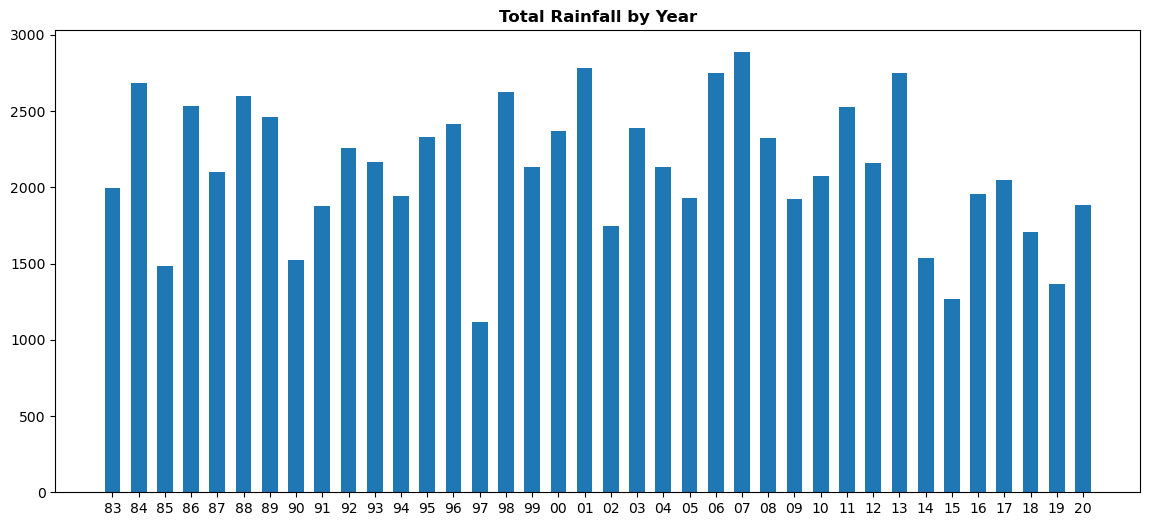

In [656]:
plt.figure(figsize=(14,6))

plt.bar(x=[i[2:] for i in df_rainfall_by_year['year']], height=df_rainfall_by_year.total_rainfall, width=0.6)

plt.title('Total Rainfall by Year', fontdict={'fontsize': 12, 'fontweight': 'bold'})

plt.show();

#### Answers:

**Observations**:

Rainfall differs a fair bit from year to year. The pattern is not consecutive, ie. the 'peaks and troughs' are spaced out. In addition, there appears to be 'clusters' where a series of consecutive years undergoes everything from low to high total rainfall. These typically span 4 to 6 years. Examples include:
- 1985 to 1989
- 1990 to 1996
- 1997 to 2001

The most recent few years, starting from 2015 (potentially the start of a new cluster encompassing 2015 to 2020), seems to be drier than previous years. Notably, there are no exceptionally high total rainfall amounts.

**Analysis**:

Analysing on the annual level is more related to climate change in general, rather than local weather patterns. The spread-out nature of 'peaks' and 'troughs' may be in part related to El Niño and La Niña that happen every 3 to 5 years, with the former resulting in less rain and the latter resulting in more rain.

[Source](https://va.ecitizen.gov.sg/CFP/CustomerPages/NEA_google/displayresult.aspx?MesId=1072837&Source=Google&url=va.ecitizen.gov.sg#:~:text=While%20every%20El%20Ni%C3%B1o%20(La,cases%20more%20than%20one%20year!)

#### Which months had the highest and lowest number of rainy days in 1990, 2000, 2010 and 2020?

In [657]:
# Using the get_max_or_min function to get the information.

min_max_rainy_days = {}

for category in [False, True]:
    for i in range(len(decades)):
        min_max_rainy_days.update(get_max_or_min(year=decades[i], col='no_of_rainy_days', lowest=category))

In [658]:
# Creating a dataframe with the information.

df_min_max_rainy_days = pd.DataFrame(data=min_max_rainy_days.items(), columns=['month', 'no_of_rainy_days'])

df_min_max_rainy_days['category'] = ['highest' for i in range(5)] + ['lowest' for i in range(4)]

df_min_max_rainy_days

,month,no_of_rainy_days,category
0,1990-09,17,highest
1,1990-11,17,highest
2,2000-11,21,highest
3,2010-11,21,highest
4,2020-07,22,highest
5,1990-03,4,lowest
6,2000-05,10,lowest
7,2010-02,4,lowest
8,2020-01,6,lowest


In [659]:
# Creating a dictionary and dataframe to store information of total number of rainy days by year.
# Incomplete years will be omitted.

min_max_rainy_days_dict = {year: df.no_of_rainy_days.groupby(df.month.str.startswith(year)).sum()[True] for year in year_str if year not in ['1982', '2021']}

df_min_max_rainy_days = pd.DataFrame(data=min_max_rainy_days_dict.items(), columns=['year', 'no_of_rainy_days'])

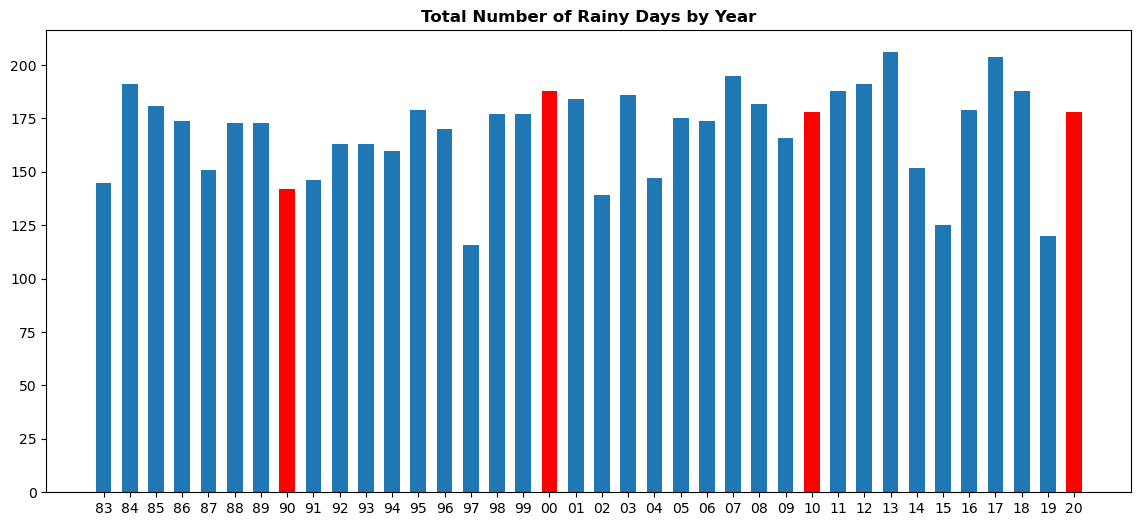

In [660]:
# Creating a bar graph to illustrate the information.

colours_list_1 = [('#1f77b4' if i not in [7, 17, 27, 37] else 'red')for i in range(38)]

plt.figure(figsize=(14,6))

plt.bar(x=[year[2:] for year in year_str if year not in ['1982', '2021']], 
        height=df_min_max_rainy_days.no_of_rainy_days, 
        color=colours_list_1,
        width=0.6)

plt.title('Total Number of Rainy Days by Year', fontdict={'fontsize': 12, 'fontweight': 'bold'})

plt.show();

#### Answers:

**Observations**:
- Nov appears 3 out of 4 years for highest rainfall.
- According to the bar chart showing total rainfall by year (from the previous question), year 2000 is not an exceptionally rainy year, yet its driest month (in terms of number of rainy days) seems to be a potential outlier.

**Analysis**:

A new bar graph showing total number of rainy days was created for context. Year 2000 appears to have one of the highest number of rainy days, which would explain why the month with the lowest number of rainy days still had 10 days of rain. 

#### Which years had the highest and lowest number of rainy days in the date range of analysis?

In [661]:
df_min_max_rainy_days.sort_values('no_of_rainy_days', ascending=False).head()

,year,no_of_rainy_days
30,2013,206
34,2017,204
24,2007,195
29,2012,191
1,1984,191


In [662]:
df_min_max_rainy_days.sort_values('no_of_rainy_days', ascending=True).head()

,year,no_of_rainy_days
14,1997,116
36,2019,120
32,2015,125
19,2002,139
7,1990,142


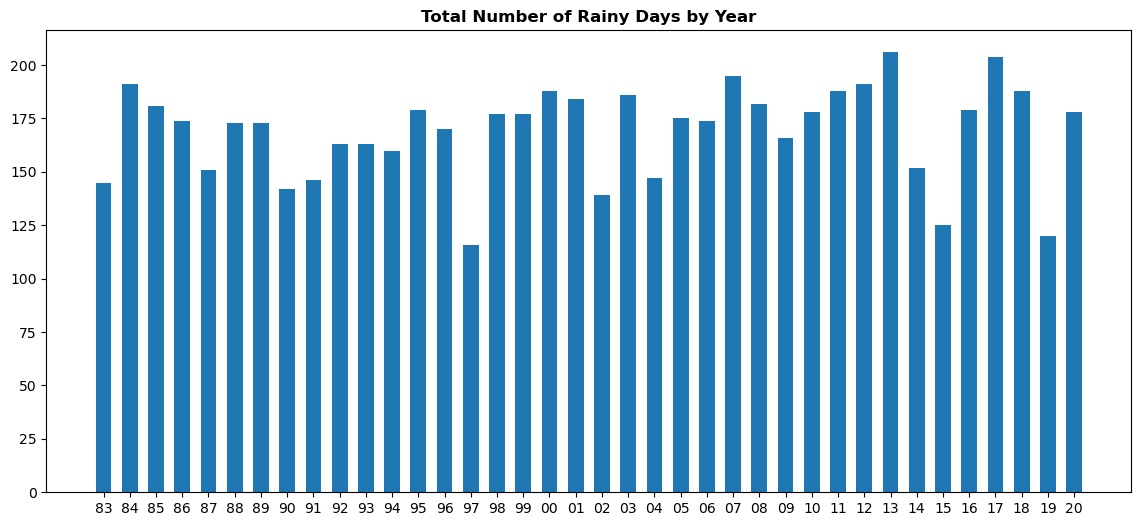

In [663]:
plt.figure(figsize=(14,6))

plt.bar(x=[year[2:] for year in year_str if year not in ['1982', '2021']], height=df_min_max_rainy_days['no_of_rainy_days'], width=0.6)

plt.title('Total Number of Rainy Days by Year', fontdict={'fontsize': 12, 'fontweight': 'bold'})

plt.show();

#### Answers:

**Observations**:
- Shares some similarities with the bar graph of total rainfall in terms of general patterns:
    - Pattern is not consecutive, ie. the 'peaks and troughs' are spaced out.
    - Clusters were fairly obvious in the previous decades.
- More fluctuations in recent years. Rather than clusters, the pattern is more akin to trough-peak. Examples:
    - 2015 to 2017
    - 2019 to 2020

**Analysis**:

Analysing on the annual level is more related to climate change in general, rather than local weather patterns. El Niño and La Niña likely impacted affected years a fair bit, as they probably did with total rainfall mentioned above. Recent years appear to be more erratic with less rainfall in general (mentioned above). This could be in part due to climate change.

#### What was the overall rainfall rate?

In [664]:
# What was the overall rainfall rate?
# Note that the rainy days are defined as days where total rainfall for that day >= 0.2mm.

rainy_days = df.no_of_rainy_days.sum()

total_days = len(pd.date_range(start='1/09/1982', end='31/08/2022'))

rr = np.round(rainy_days / total_days, decimals=5)

rr

C:\Users\65902\miniconda3\envs\dsi-sg\lib\site-packages\IPython\core\interactiveshell.py:3433: UserWarning: Parsing '31/08/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  exec(code_obj, self.user_global_ns, self.user_ns)


0.45706

#### Answer:
The overall rainfall rate, correct to 5 decimal places, was **0.45706**.

#### Which months had higher or lower rainfall rates?

In [665]:
# Which months had higher or lower rainfall rates?

# Dictionary will be in the form of 
# month: [rainy days, total_days]
rainy_days_by_month = {}

for month in month_str:
    
    # Creating a list for each key; first element is fixed at a value of 0 for now.
    rainy_days_by_month[month] = [0]
    
    # Second element of each list corresponds to that month's total days as obtained from the total_days_by_month dictionary.
    rainy_days_by_month[month].append(round(total_days_by_month[month]))
    
    for i in range(n_months):
        
        # Filtering by month.
        if df.month[i].endswith(month):
            
            # First element of each list is a sum of that month's total number of rainy days over the 40 years.
            rainy_days_by_month[month][0] += df.no_of_rainy_days[i]

# Dictionary will be in the form of 
# month: rainfall rate
rr_by_month = {}
            
for month in rainy_days_by_month.keys():
    
    # The value for each key (month) corresponds to that month's rainfall rate, which is calculated using information from the rainy_days_by_month dictionary.
    rr_by_month[month] = round(rainy_days_by_month[month][0] / rainy_days_by_month[month][1], 5)

In [666]:
# Getting the average value by month for each of the 3 variables: mean relative humidity, mean surface air temperature, mean hours of sunshine

# Dictionary will be in the form of 
# month: [mean rh, mean temp, mean hrs of sunshine]
df_mean_dict = {}

for month in month_str:
    df_mean_dict[month] = []
    df_mean_dict[month].append(rr_by_month[month])
    df_mean_dict[month].append(np.round(np.mean(df[df.month.str.endswith(month)].mean_humidity), decimals=1))
    df_mean_dict[month].append(np.round(np.mean(df[df.month.str.endswith(month)].mean_temp), decimals=1))
    df_mean_dict[month].append(np.round(np.mean(df[df.month.str.endswith(month)].mean_sunshine_hrs), decimals=1))

In [667]:
# Creating a DataFrame to store the above information.

df_mean = pd.DataFrame(df_mean_dict.values(), index=month_str, columns=['rainfall_rate', 'mean_humidity', 'mean_temp', 'mean_sunshine_hrs'])

In [668]:
df_mean[['rainfall_rate']].sort_values('rainfall_rate', ascending=False)

,rainfall_rate
11,0.63417
12,0.60161
10,0.48226
04,0.48167
05,0.45242
08,0.45081
06,0.44417
09,0.44083
07,0.44032
01,0.43387


#### Answer:

There is an obvious 'grouping' of months:
- Wettest months: last 3 months of each year.
- Driest months: first 3 months of each year.
- Remaining months are in the middle of the year as well as middle of the range of rainfall rates.

Rainfall rates differed a lot by months. The wettest months (Nov & Dec) had average rainfall rates of >0.6 while Feb, the driest month, had an average rainfall rate <0.3. All other months had average rainfall rates in the 0.4 - 0.49 range. Nov, Dec, Oct & Apr had rainfall rates exceeding the average of 0.45706.

#### How variable were rainfall rates by month?

In [669]:
# Obtaining exact rainfall rates for each of the 488 months, grouped by month.

rr_01 = rr_by_month_show_all(month='01', sort=True, ascending=False)
rr_02 = rr_by_month_show_all(month='02', sort=True, ascending=False)
rr_03 = rr_by_month_show_all(month='03', sort=True, ascending=False)
rr_04 = rr_by_month_show_all(month='04', sort=True, ascending=False)
rr_05 = rr_by_month_show_all(month='05', sort=True, ascending=False)
rr_06 = rr_by_month_show_all(month='06', sort=True, ascending=False)
rr_07 = rr_by_month_show_all(month='07', sort=True, ascending=False)
rr_08 = rr_by_month_show_all(month='08', sort=True, ascending=False)
rr_09 = rr_by_month_show_all(month='09', sort=True, ascending=False)
rr_10 = rr_by_month_show_all(month='10', sort=True, ascending=False)
rr_11 = rr_by_month_show_all(month='11', sort=True, ascending=False)
rr_12 = rr_by_month_show_all(month='12', sort=True, ascending=False)

In [670]:
# Calculating median, standard deviation, mean and standard deviation as a proportion of mean for the rainfall rates in each of the 12 rr_ variables coded above.

# Dictionary will be in the form of month: [median, standard deviation, mean, standard deviation / mean]
rr_stats_by_month = {}

for rr, month in zip([rr_01, rr_02, rr_03, rr_04, rr_05, rr_06, rr_07, rr_08, rr_09, rr_10, rr_11, rr_12], month_str):
    
    median = np.round(np.median(list(rr.values())), decimals=3)
    
    std_dev = np.round(np.std(list(rr.values())), decimals=3)
    mean = np.round(np.mean(list(rr.values())), decimals=3)
    
    proportion = np.round(std_dev/mean, decimals=3)
    
    # Populating the dictionary.
    rr_stats_by_month[month] = []
    
    for val in [median, std_dev, mean, proportion]:
        rr_stats_by_month[month].append(val)

In [671]:
# Creating a DataFrame to store the information obtained above.

df_stats_by_month = pd.DataFrame(rr_stats_by_month.values(), index=month_str, columns=['median', 'std. dev.', 'mean', 'std. dev. / mean'])

df_stats_by_month.sort_values('std. dev. / mean', ascending=False)

,median,std. dev.,mean,std. dev. / mean
02,0.286,0.181,0.296,0.611
03,0.371,0.176,0.404,0.436
01,0.419,0.174,0.434,0.401
09,0.433,0.145,0.441,0.329
10,0.516,0.141,0.482,0.293
07,0.436,0.126,0.440,0.286
08,0.419,0.123,0.451,0.273
04,0.467,0.121,0.482,0.251
06,0.433,0.104,0.444,0.234
05,0.419,0.105,0.452,0.232


#### Answer:

**Measurement of volatility**

Volatility was measured by dividing standard deviation by mean (rightmost column). This was done to ensure comparability. For example, a standard deviation of 5 may be considered high for a mean of 10 but low for a mean of 100. This will be referred to as the volatility value.

**Driest months (Jan, Feb, Mar) were the most volatile**

They were the only months to have volatility values of >0.4. This is likely because they constitute the tail-end of the Northeast Monsoon. Since the monsoon season doesn't have dates that are set in stone, changes in patterns (delays, etc.) can affect these three months a lot, especially since the change is from the wettest to the driest period of the year. In addition, with low rainfall rates, they are _disproportionately_ affected by any changes in rainfall as compared to other months.

**Wettest months (Nov, Dec) were the most stable**

They were the only months to have volatility values of <0.4. With the highest means, they may be better poised to 'weather' changes in weather patterns over the years. In addition, since they are in the middle of the rainy season, they are much less affected by when the monsoon season actually begins.

#### How did humidity levels impact rainfall rates?

In [672]:
# Creating an identical version of the df_mean dataset but with more reader-friendly column names.

df_mean_heatmap = df_mean.copy()
df_mean_heatmap.rename(mapper={key: value for key, value in zip(['rainfall_rate', 'mean_humidity', 'mean_temp', 'mean_sunshine_hrs'], 
                                                                ['Rainfall rate', 'Mean humidity', 'Mean temperature', 'Mean hours of sunshine'])},
                       axis=1, inplace=True)

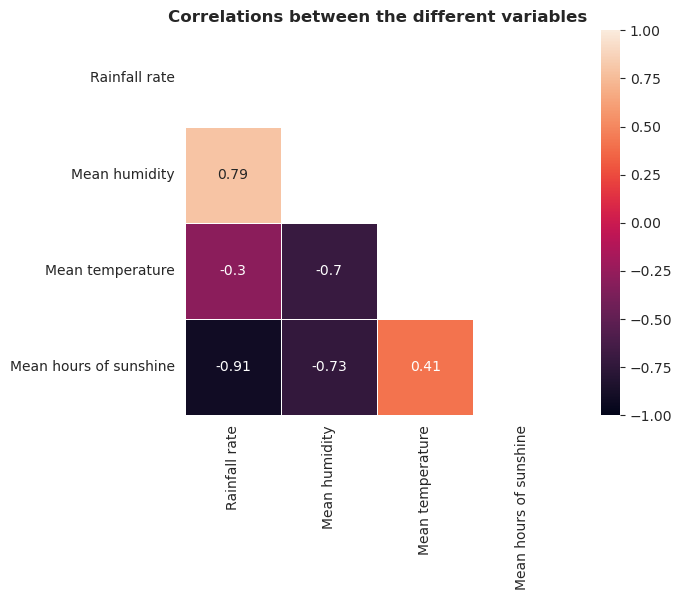

In [673]:
# Plotting the heatmap to explore correlations between rainfall rate and other mean values.
# This heatmap will be referenced at various points in the EDA.

plt.figure(figsize = (8,5))

mask = np.zeros_like(df_mean_heatmap.corr())
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    sns.heatmap(df_mean_heatmap.corr(), mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5)

plt.title('Correlations between the different variables', fontdict={'fontweight': 'bold'});

In [674]:
rr_rh = rr_specific(col='mean_humidity', parts=10)

In [675]:
# Creating a DataFrame to be able to compare values at a glance.
# Rows will be based on the same value ranges as above (in the same sorting order).
# Columns include:
# rr_humidity --> rainfall rates corresponding to each range
# n_months_total --> number of months corresponding to each range
# 12 columns for each of the 12 months, where values correspond to number of occurences by month for each range

df_rh = pd.DataFrame(rr_rh.values(), index=rr_rh.keys(), columns=['rr_humidity', 'n_months_total'])

for mth in month_str:
    df_rh[mth] = n_occurences(month=mth, 
                              column='mean_humidity', 
                              vals_lower=[72] + [i for i in range(72, 90, 2)] + [None], 
                              vals_upper=[None] + [i for i in range(74, 92, 2)] + [90]).values()

In [676]:
df_rh.sort_values(['rr_humidity'], ascending=False)

,rr_humidity,n_months_total,01,02,03,04,05,06,07,08,09,10,11,12
between 88.0 and 90.0,0.69730,6,1,0,0,0,0,0,0,0,0,0,1,4
greater than 90.0,0.67742,2,0,0,0,0,0,0,0,0,0,0,0,2
between 86.0 and 88.0,0.62484,52,9,3,7,3,2,1,0,0,0,1,14,12
between 84.0 and 86.0,0.55455,94,11,5,8,12,9,2,3,6,7,7,12,12
less than or equal to 72.0,0.51613,1,0,0,0,0,0,0,0,0,0,1,0,0
between 82.0 and 84.0,0.46037,130,10,8,5,12,16,13,14,11,14,16,7,4
between 78.0 and 80.0,0.40472,57,3,5,5,3,6,8,7,9,3,5,2,1
between 80.0 and 82.0,0.39062,74,1,10,6,4,4,10,9,7,9,7,3,4
between 76.0 and 78.0,0.33651,38,4,4,3,5,3,4,5,5,3,1,1,0
between 72.0 and 74.0,0.33491,7,0,1,1,0,0,0,0,2,2,0,0,1


In [677]:
df_mean[['rainfall_rate', 'mean_humidity']].sort_values('mean_humidity', ascending=False)

,rainfall_rate,mean_humidity
12,0.60161,85.4
11,0.63417,84.8
01,0.43387,83.5
04,0.48167,82.5
05,0.45242,82.3
03,0.40403,81.8
10,0.48226,81.8
09,0.44083,81.2
07,0.44032,81.0
02,0.29646,80.9


In [678]:
# Creating a copy of df to plot boxplots.

df_plots = df.copy()

df_plots['no_of_rainy_days'] = df_plots['no_of_rainy_days']/df_plots['total_days']

df_plots['average_daily_rainfall'] = df_plots['total_rainfall']/df_plots['total_days']

In [679]:
# Creating a mth variable to filter dataframe by months

df_plots['mth'] = df_plots['month'].str.split('-', expand=True)[1].astype(int)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

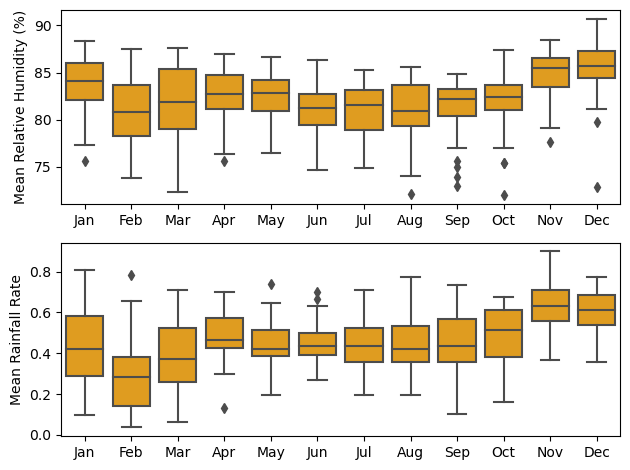

In [680]:
# Plotting boxplots for mean relative humidity & mean rainfall rate by month.

fig, axes = plt.subplots(2,1)

bplot_rh = sns.boxplot(df_plots, x='mth', y='mean_humidity', ax=axes[0], palette=['orange'])
bplot_rh.set_xticklabels(months)
bplot_rh.set_xlabel("")
bplot_rh.set_ylabel("Mean Relative Humidity (%)")

bplot_rr = sns.boxplot(df_plots, x='mth', y='no_of_rainy_days', ax=axes[1], palette=['orange'])
bplot_rr.set_xticklabels(months)
bplot_rr.set_xlabel("")
bplot_rr.set_ylabel("Mean Rainfall Rate")

plt.tight_layout()
plt.show();

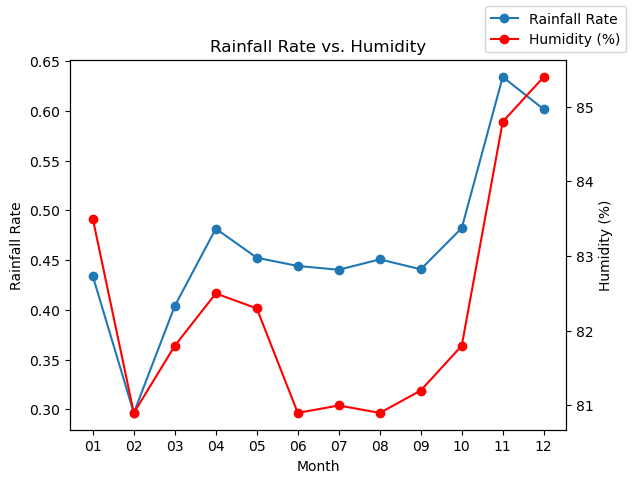

In [681]:
compare_lines('mean_humidity', 'Humidity (%)', 'Humidity')

#### Answers:

**The higher the humidity level, the higher the rainfall rate.**

There is a strong positive correlation (0.79 as per the heatmap). Nov & Dec were the most humid as well as wettest months. 6 out of 8 months that experienced humidity >88% (rainfall rate > 0.67) took place in Dec. 26 of 52 months that experienced humidity > 86% (rainfall rate > 0.62) were Nov & Dec.

For any given month, humidity <82% almost always corresponds to an average rainfall rate of <0.46. In particular, Feb (driest month) and Jun had 24 occurences each in this range. 

The Jun - Aug period does seem less humid than would otherwise be expected. This could be due to other factors at play, such as higher temperatures during these months.

Comparing the boxplots, it can be seen that the driest months (Jan - Mar) tend to have fairly large ranges for both average rainfall rates & average humidity levels. This supports the idea that these months can vary quite a lot in terms of weather from year to year.

#### How did surface air temperature impact rainfall rate?

In [682]:
rr_temp = rr_specific(col='mean_temp', parts=13)

In [683]:
# Creating another DataFrame to be able to compare values at a glance.

df_temp = pd.DataFrame(rr_temp.values(), index=rr_temp.keys(), columns=['rr_temp', 'n_months_total'])

for mth in month_str:
    df_temp[mth] = n_occurences(month=mth, column='mean_temp',
                                vals_lower=[26] + list(np.linspace(26, 28.75, 12)) + [None], 
                                vals_upper=[None] + list(np.linspace(26.25, 29, 12)) + [29]).values()

In [684]:
df_temp.sort_values('rr_temp', ascending=False)

,rr_temp,n_months_total,01,02,03,04,05,06,07,08,09,10,11,12
less than or equal to 26.0,0.58845,9,4,1,0,0,0,0,0,0,0,0,0,4
between 26.25 and 26.5,0.57736,26,7,3,4,0,0,0,0,0,0,0,3,9
between 27.5 and 27.75,0.54200,37,1,2,2,5,2,1,5,4,4,7,1,3
between 26.5 and 26.75,0.52567,27,7,5,1,0,0,0,0,0,1,1,5,7
between 27.0 and 27.25,0.52419,33,2,7,5,0,0,0,1,1,3,2,9,3
between 26.75 and 27.0,0.50189,35,9,6,2,1,0,0,1,1,3,1,3,8
between 27.25 and 27.5,0.49649,66,2,9,5,4,2,2,4,8,4,9,14,3
between 26.0 and 26.25,0.48921,9,5,0,0,0,0,0,0,0,0,0,1,3
between 27.75 and 28.0,0.43859,66,2,2,5,8,2,5,8,7,14,9,4,0
between 28.0 and 28.25,0.41849,45,0,2,7,7,7,6,4,7,2,3,0,0


In [685]:
df_mean[['rainfall_rate', 'mean_temp']].sort_values('mean_temp', ascending=False)

,rainfall_rate,mean_temp
05,0.45242,28.5
06,0.44417,28.4
04,0.48167,28.1
07,0.44032,28.1
08,0.45081,28.0
09,0.44083,27.8
10,0.48226,27.8
03,0.40403,27.7
02,0.29646,27.3
11,0.63417,27.1


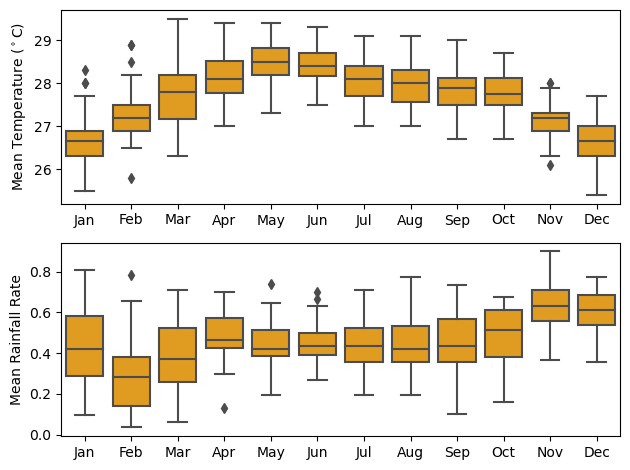

In [686]:
# Plotting boxplots for mean temperature & mean rainfall rate by month.

fig, axes = plt.subplots(2,1)

bplot_temp = sns.boxplot(df_plots, x='mth', y='mean_temp', ax=axes[0], palette=['orange'])
bplot_temp.set_xticklabels(months)
bplot_temp.set_xlabel("")
bplot_temp.set_ylabel("Mean Temperature ($^\circ$C)")

bplot_rr = sns.boxplot(df_plots, x='mth', y='no_of_rainy_days', ax=axes[1], palette=['orange'])
bplot_rr.set_xticklabels(months)
bplot_rr.set_xlabel("")
bplot_rr.set_ylabel("Mean Rainfall Rate")

plt.tight_layout()
plt.show();

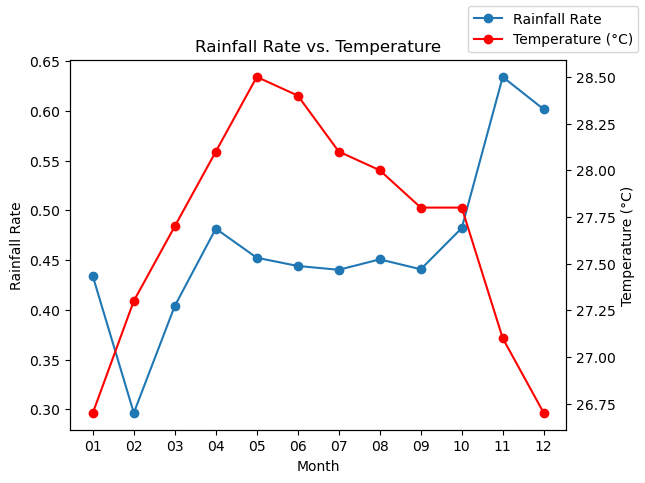

In [687]:
compare_lines('mean_temp', 'Temperature (°C)', 'Temperature')

#### Answers:

**The lower the surface air temperature ('temperature'), the higher the rainfall rate.**

There is a slightly weak inverse correlation (0.3 as per the heatmap) - certain months do not really follow the 'expected pattern'. However, there is still a certain pattern to be found. Using the average rainfall rate (0.45706) to 'split' the groups (ranges), we can see that:
- All groups <= 27.75°C had above-average rainfall rates
- All groups > 27.75°C had below-average rainfall rates.
    
More specifically, when temperature <= 26.5°C, rainfall rate > 0.57. 24 of 35 months that experienced this took place in Dec & Jan. Keeping in mind the aforementioned volatility, it is possible that Jan appears in this range more than expected as those were the years when it had higher rainfall rates. 
    
The hottest period - Apr to Jun - is not the driest period. From the line chart, it appears that the driest period (Jan - Mar) doesn't follow the expected pattern, and may be the reason the correlation isn't as strong. This may be due in part to temperature being a rather seasonal affair, as can be seen from the shape of the line chart. In addition, Jan - Mar are the volatile months that are chiefly affected by the Northeast Monsoon, ie. they may be affected by the listed variables, but not to the same extent as other months. 

From the boxplots, we can see that temperature values falling outside of the interquartile range for Mar vary a significant amount. In fact, the upper extreme rivals or even exceeds that of the hottest months'. According to external sources, this sometimes happens in Mar when a specific set of conditions is in effect:
> Light winds, cloudless skies and more direct solar radiation

It is likely that these conditions coincide with the Northeast Monsoon ending earlier, since that would mean that surface winds become lighter and the entire 'period' is shifted earlier, such that the highest temperatures shift slightly from Apr to Mar.

#### Did sunny days experience higher or lower rainfall rates as compared to cloudier days?

In [688]:
rr_sun = rr_specific(col='mean_sunshine_hrs', parts=13)

In [689]:
# Creating another DataFrame to be able to compare values at a glance.

df_sun = pd.DataFrame(rr_sun.values(), index=rr_sun.keys(), columns=['rr_sun', 'n_months_total'])

for mth in month_str:
    df_sun[mth] = n_occurences(month=mth, column='mean_sunshine_hrs',
                                vals_lower=[3.0] + list(np.linspace(3, 8.5, 12)) + [None], 
                                vals_upper=[None] + list(np.linspace(3.5, 9, 12)) + [9.0]).values()

In [690]:
df_sun.sort_values('rr_sun', ascending=False)

,rr_sun,n_months_total,01,02,03,04,05,06,07,08,09,10,11,12
between 3.0 and 3.5,0.60870,15,0,0,1,0,0,0,0,0,1,1,4,8
between 4.0 and 4.5,0.59932,48,7,1,4,0,0,2,1,2,3,10,11,7
between 3.5 and 4.0,0.57994,21,4,1,0,0,0,0,1,0,2,1,8,4
less than or equal to 3.0,0.56452,2,0,0,0,0,0,0,0,0,0,0,0,2
between 4.5 and 5.0,0.55370,59,4,3,3,0,2,4,3,5,9,8,10,8
between 5.0 and 5.5,0.52369,78,4,1,5,10,5,8,7,7,9,9,4,9
between 5.5 and 6.0,0.44693,88,5,4,4,11,20,10,7,7,9,6,3,2
between 6.0 and 6.5,0.43259,63,3,4,4,8,6,8,8,12,5,5,0,0
between 6.5 and 7.0,0.35644,47,4,5,3,8,7,6,8,4,2,0,0,0
between 7.0 and 7.5,0.31243,28,6,6,7,3,0,2,2,2,0,0,0,0


In [691]:
df_mean[['rainfall_rate', 'mean_sunshine_hrs']].sort_values('mean_sunshine_hrs', ascending=False)

,rainfall_rate,mean_sunshine_hrs
02,0.29646,7.1
03,0.40403,6.3
04,0.48167,6.1
07,0.44032,6.1
05,0.45242,6.0
06,0.44417,5.9
08,0.45081,5.9
01,0.43387,5.7
09,0.44083,5.3
10,0.48226,5.1


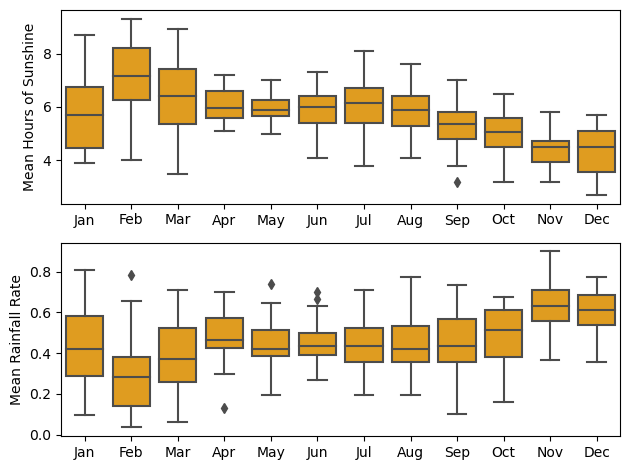

In [692]:
# Plotting boxplots for mean number of hours of sunshine & mean rainfall rate by month.

fig, axes = plt.subplots(2,1)

bplot_sun = sns.boxplot(df_plots, x='mth', y='mean_sunshine_hrs', ax=axes[0], palette=['orange'])
bplot_sun.set_xticklabels(months)
bplot_sun.set_xlabel("")
bplot_sun.set_ylabel("Mean Hours of Sunshine")

bplot_rr = sns.boxplot(df_plots, x='mth', y='no_of_rainy_days', ax=axes[1], palette=['orange'])
bplot_rr.set_xticklabels(months)
bplot_rr.set_xlabel("")
bplot_rr.set_ylabel("Mean Rainfall Rate")

plt.tight_layout()
plt.show();

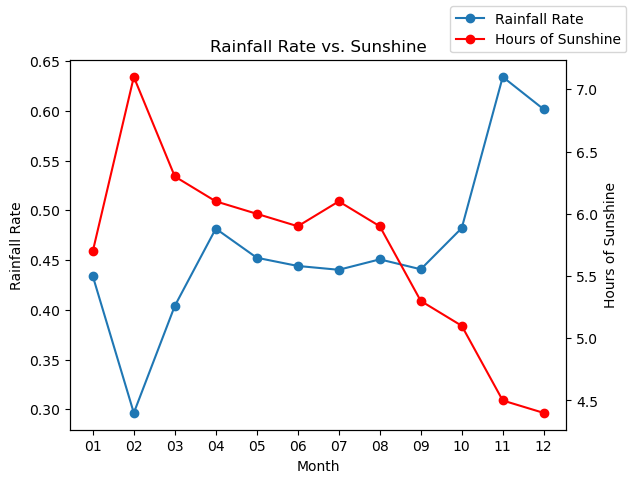

In [693]:
compare_lines('mean_sunshine_hrs', 'Hours of Sunshine', 'Sunshine')

#### Answers:

**The lower the number of hours of sunshine, the higher the rainfall rate.**
Very strong inverse correlation (0.91 as per the heatmap). Using the average rainfall rate (0.45706) to 'split' the groups (ranges), we can see that:
- All groups with <=5.5 hours of sunshine had above-average rainfall rates.
- All groups with >5.5 hours of sunshine had below-average rainfall rates.
    
The wettest months (Nov & Dec) almost always experience <= 5.5 hours of sunshine. On the other hand, when number of hours of sunshine >= 7.5 hours, rainfall rates < 0.22. This took place in 31 months, 15 of which were Feb and 9 were Mar - both are amongst the driest months. Taking into account temperature as well, it seems that February tends to be fairly sunny without being that hot.

From the boxplots, it is evident that there is a very stark contrast between the driest months (Jan - Mar) & Apr - Jun in terms of both mean hours of sunshine and mean rainfall rates. Specifically, the former has experiences a very wide range and the reverse is true of the latter. This once again emphasises how much an effect the Northeast Monsoon (especially the second half) has on weather.

#### Were there any outlier months in the dataset?

In [716]:
# Looking into February, since it was the most volatile.

df[df.month.str.endswith('02')].describe()

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_humidity,mean_sunshine_hrs,mean_temp,total_days
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,38.230000,8.375000,105.822500,80.925000,7.087500,27.252500,28.250000
std,35.430287,5.197078,106.807408,3.632951,1.445982,0.640508,0.438529
min,0.200000,1.000000,0.200000,73.800000,4.000000,25.800000,28.000000
25%,16.400000,4.000000,30.375000,78.300000,6.275000,26.900000,28.000000
50%,30.300000,8.000000,74.250000,80.850000,7.150000,27.200000,28.000000
75%,47.125000,11.000000,158.175000,83.700000,8.225000,27.500000,28.250000
max,159.300000,22.000000,470.400000,87.500000,9.300000,28.900000,29.000000


In [717]:
# Looking at summary statistics of the entire dataset.

df.describe()

,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_humidity,mean_sunshine_hrs,mean_temp,total_days
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.00000
mean,52.618542,14.135417,178.324375,82.263333,5.680833,27.682917,30.43750
std,35.901015,4.944409,114.332917,3.426580,1.205938,0.802267,0.81495
min,0.200000,1.000000,0.200000,72.000000,2.700000,25.400000,28.00000
25%,30.850000,11.000000,94.150000,80.000000,4.800000,27.100000,30.00000
50%,44.000000,14.000000,160.100000,82.700000,5.700000,27.700000,31.00000
75%,63.325000,18.000000,239.650000,84.725000,6.425000,28.300000,31.00000
max,216.200000,27.000000,765.900000,90.700000,9.300000,29.500000,31.00000


In [721]:
df[df.month.str.endswith('02')].sort_values('total_rainfall', ascending=False).head(3)

,month,maximum_rainfall_in_a_day,no_of_rainy_days,total_rainfall,mean_humidity,mean_sunshine_hrs,mean_temp,total_days
17,1984-02,154.4,19,470.4,86.0,4.1,25.8,29
365,2013-02,95.2,22,395.2,86.9,4.0,26.5,28
149,1995-02,159.3,16,334.0,87.5,4.9,26.5,28


#### Answers:

**Observations**:

Feb 1984 provided some surprising statistics. It was an extremely wet month with figures that well surpasses the overall averages for maximum rainfall in a day, number of rainy days as well as total rainfall. Using the bar graphs that were plotted above, we can see that 1984 was a very wet year on average as well. According to [this source](http://www.weather.gov.sg/climate-el-la/), it was considered an anomaly in terms of rainfall but was not attributable to either el niño or la niña. Since this was more of a one-off that was a long time ago, it should not be much of a concern.

#### Which months had the highest and lowest total rainfall? Does this information affect the way we view rainfall rates?

In [694]:
# Dictionary will be in the form of
# month: average total rainfall
total_rainfall_by_month = {}

for month in month_str:
    
    total_rainfall_by_month[month] = 0
    
    # Getting total rainfall across 40 years for each of the 12 months.
    for i in range(n_months):
        if df['month'][i].endswith(month):
            total_rainfall_by_month[month] += df['total_rainfall'][i]

    # Getting average total rainfall.
    total_rainfall_by_month[month] /= 40
        
    total_rainfall_by_month[month] = round(total_rainfall_by_month[month])

sort_dict(total_rainfall_by_month, ascending=False)

{'12': 311,
 '11': 256,
 '01': 237,
 '05': 168,
 '03': 161,
 '10': 160,
 '04': 159,
 '07': 149,
 '08': 149,
 '09': 147,
 '06': 137,
 '02': 106}

#### Answers:

The top 3 months have much higher average total rainfall (>200) compared to the other months. Jan is one of the drier months by rainfall rate (proportion of rainy vs total days in a month) but the 3rd wettest. This may indicate that the weather in Jan can fluctuate quite a lot, with a few days experiencing heavy rain but dry weather on other days.

**Notes on the other months**
- Oct & Apr may experience 'gentler' showers (higher rainfall rates but average in terms of total rainfall)
- Mar most likely experiences stormy days (low rainfall rate but fairly high total rainfall). May is similar but much less extreme.
- Jun - Sep seem fairly consistent for the most part. Rainy days are probably fairly similar across all 4 months.

#### Which months have a trend of having high maximum rainfall (a day in the month)? Does this information affect the way we view rainfall rates?

In [695]:
# Dictionary will be in the form of 
# month: average maximum rainfall in a day
max_rainfall_by_month = {}

for month in month_str:
    
    max_rainfall_by_month[month] = 0
    
    for i in range(n_months):
        if df['month'][i].endswith(month):
            max_rainfall_by_month[month] += round(df['maximum_rainfall_in_a_day'][i])
            
    max_rainfall_by_month[month] /= 40
        
    max_rainfall_by_month[month] = round(max_rainfall_by_month[month])

sort_dict(max_rainfall_by_month, ascending=False)

{'12': 79,
 '01': 78,
 '11': 70,
 '05': 49,
 '08': 49,
 '03': 47,
 '04': 47,
 '09': 45,
 '06': 44,
 '10': 44,
 '07': 41,
 '02': 38}

#### Answers:

The top 3 months have much higher values (70mm to 80mm) compared to the other months (38mm to 49mm). This further stengthens the idea that Jan might be a somewhat unpredictable month with fewer than average rainy days but heavy rains on days when it did rain.

### EDA question: Does comparing maximum rainfall in a day, total rainfall and number of rainy days provide any further insights?

In [696]:
# Calculating proportion (max rainfall / number of rainy days) may provide some insights when considered in conjunction with rainfall rates.

# Dictionary will be in the form of month: max rainfall / number of rainy days
max_rainfall_div_rainy_days = {}

for month in month_str:
    max_rainfall_div_rainy_days[month] = np.round(max_rainfall_by_month[month] / rainy_days_by_month[month][0], decimals=3)

In [697]:
# Calculating proportion (total rainfall / number of rainy days) may provide some insights when considered in conjunction with rainfall rates.

# Dictionary will be in the form of month: total rainfall / number of rainy days
total_rainfall_div_rainy_days = {}

for month in month_str:
    total_rainfall_div_rainy_days[month] = np.round(total_rainfall_by_month[month] / rainy_days_by_month[month][0], decimals=3)

In [698]:
# Creating a DataFrame to store the above information.

df_rain = pd.DataFrame(max_rainfall_by_month.values(), index=month_str, columns=['avg. max rainfall'])

df_rain['max rainfall / rainy days'] = max_rainfall_div_rainy_days.values()
df_rain['avg. total rainfall'] = total_rainfall_by_month.values()
df_rain['total rainfall / rainy days'] = total_rainfall_div_rainy_days.values()
df_rain['max rainfall / total rainfall'] = np.round(df_rain['avg. max rainfall'] / df_rain['avg. total rainfall'], decimals=3)

df_rain.sort_values(['total rainfall / rainy days'], ascending=False)

,avg. max rainfall,max rainfall / rainy days,avg. total rainfall,total rainfall / rainy days,max rainfall / total rainfall
01,78,0.145,237,0.441,0.329
12,79,0.106,311,0.417,0.254
11,70,0.092,256,0.336,0.273
03,47,0.094,161,0.321,0.292
02,38,0.113,106,0.316,0.358
05,49,0.087,168,0.299,0.292
09,45,0.085,147,0.278,0.306
04,47,0.081,159,0.275,0.296
07,41,0.075,149,0.273,0.275
10,44,0.074,160,0.268,0.275


In [699]:
df_rain[['total rainfall / rainy days']].sort_values(['total rainfall / rainy days'], ascending=False)

,total rainfall / rainy days
01,0.441
12,0.417
11,0.336
03,0.321
02,0.316
05,0.299
09,0.278
04,0.275
07,0.273
10,0.268


In [700]:
df_rain[['max rainfall / rainy days', 'avg. max rainfall']].sort_values(['max rainfall / rainy days'], ascending=False)

,max rainfall / rainy days,avg. max rainfall
01,0.145,78
02,0.113,38
12,0.106,79
03,0.094,47
11,0.092,70
08,0.088,49
05,0.087,49
09,0.085,45
06,0.083,44
04,0.081,47


#### Answers:

**Examining the total rainfall / number of rainy days column:**

The higher the number, the heavier the rain was on average for that particular month (through the years) and vice-versa. 

Jan & Dec have particularly high numbers (> 0.4), indicating that these months tended to experience heavy rain on days when it rained. For Dec, this suggests very wet months due to high rainfall rates _and_ high total rainfall. For Jan, this indicates that, while it has fewer rainy days on average, storms were probably prevalent.

Conversely, months at the other end (Jun, Oct) were likely to have experienced lighter rain on average on days when it rained.

**Examining the max rainfall / number of rainy days column:**

Similar to total rainfall / number of rainy days, this column shows how heavily it could have rained, but only for a given day in the month.

Jan is right at the top with an unusually high value (0.145). Its absolute value for max. rainfall in a day is also extremely high (78 mm), second only to Dec (79 mm). This further supports the idea that Jan is prone to rather 'wild' weather.

Feb & Dec both have values >0.1 although quite a bit lower than Jan. Feb's absolute value for max. rainfall in a day is very low (38 mm); the proportion value is likely high due to the low number of rainy days.

All other months have rather evenly spread-out values in the range from 0.074 to 0.094. Low values may indicate a lower probability of unexpectedly heavy storms taking place.

### Part (C): ending notes

#### Potential explanations behind correlations between the different variables and rainfall rates

In Singapore, sunny days are typically hot due partially to lack of cloud cover. Cloudiness is often an important factor in whether or not it will rain (the water cycle). This may explain, in part, why hot, sunny days are inversely related with rainfall rates.

Humidity, which broadly refers to the amount of water vapour in the air, has a two-way relationship with rain where they influence one another. In the case of humidity affecting rainfall rates, an example would be hot and sunny days bringing down humidity levels due to evaporation, thus lowering probability of rain. 

From the above, we can see the interconnectedness of the variables, ie. a combination of low(high) humidity, high(low) temperature and high(low) number of hours of sunshine tends to correlate with low(high) rainfall rates.

#### Volatility of the driest months (Jan - Mar)
Happens mainly due to the Northeast Monsoon. As mentioned earlier, the monsoon period is not 'set in stone'. For any given year that experiences the dry season earlier(later):
- Jan might be drier(wetter).
- Feb might be drier(wetter), if the delay is fairly significant.
- Mar might be wetter(drier) if this results in the dry period ending earlier(later).

## Conclusions and Recommendations

### Outdoor activities

#### Oct: start of the rainy season

Cool, wet conditions are typically expected as the year nears the later months; Oct typically marks the start of the rainy season. It has a much lower rainfall rate compared to Nov and Dec, but it's still above the average rainfall rate. Continuing on from Sep, rainfall becomes heavier once October hits, and storms typically strike during afternoons and early evenings. In addition, some volatility is expected since there is no 'official' or exact start to the monsoon period.

#### Avoid the rainiest months - Nov & Dec

Both months have _consistently_ proven to be the wettest of all months. In addition, both months tend to experience moderate to heavy rainfall that goes on continuously over consecutive days, sometimes lasting up to a week! If complete avoidance is not possible, especially since it's for an entire 2-month stretch, consider the following:
- Create ample wet weather plans while keeping in mind that they are, more likely than not, going to be used.
- Create flexible schedules that involve both indoor and outdoor activities, preferably in an interchangeable manner.
- Simplify schedules & avoid being over-ambitious - Dec is a popular month for travelling anyway.
    
#### Jan is a fairly unpredictable month - tread with caution

As the tail-end of the wet season, Jan's lack of predictability is unsurprising, since the exact start & end of monsoon seasons are not set in stone. Consider the following mitigating measures:
- Keep the schedule for Jan largely interchangeable; weather patterns, while not obvious way ahead of time, may potentially be more predictable when it's closer to the actual month. Having a good mix of outdoors and indoors activities for the month makes it easier to swap them out for one another.
- Schedule outdoor activities towards the tail-end of the month when the dry season is slated to begin.
- Have a few solid wet weather plans on hand:
    - Despite being the third driest season on paper, there's actually still a 43% chance of rain on any given day!
    - The rainiest day in January is often one of the rainiest days in the entire year as well - if this is the day of the activity, the wet weather plan will most certainly need to be used.

Being the start of the year, Jan is typically when people feel the most motivated to 'up' their fitness game or kickstart a new and improved lifestyle. We can further encourage this by planning fitness events that can take place rain or shine, ie. mostly indoors.

#### Feb is the most unpredictable month of all, but rainfall rates are low enough that a gamble will probably be worth it

In addition to having the lowest rainfall rate, when it does rain, it's likely to be fairly manageable. Unlike Jan, the rainiest day in Feb is probably just an average shower. It is one of the cooler months as well - it had a mean surface air temperature of <= 27.5 degrees celsius more than 80% of the time! During dry weather, it is great for more strenuous / long / large-scale outdoor activities such as hiking, mass running events, beach clean-up, outdoor performances, etc. Feb is likely most affected by what the year is going to be like in general (some years are just wetter overall). For an average year, planning as per normal with 1 or 2 wet weather plans on hand should suffice.

#### Mar - like Jan, but slightly better

The unpredictability of Mar comes from it being the tail-end of the monsoon season. As the month progresses, it may get hotter, less windy, and more prone to afternoon/evening showers. There's an opportunity to take advantage of the drier, more cooling weather in the beginning part of March. Technically, a dry day in March would be ideal for more 'intense' outdoor activities, such as an outing to the beach or botanical gardens, but keep in mind that the tail-end of the monsoon season will inherently be slightly uncertain. Schedule outdoor activities in the beginning of the month when the dry season is still likely to be in full force.

#### Apr & May: surprisingly hot (especially in the afternoons)

Both also have higher rainfall rates compared to Jun/Jul/Sep. Occasional thunderstorms in the afternoons may last till early evening. Hot & potentially rainy, with above-average humidity levels, there's a need to plan for a greater variety of events during these months & keep them largely interchangeable so that they can be altered when more accurate information pours in, for example from the meteorological agency. 

#### Jun, Jul & Sep: good for casual outdoor activities

These months typically experience low rainfall rates, although still higher than the Jan - Mar period. When it does rain, showers are likely to be moderate. There's a chance that they will take place in the afternoon but typically won't last too long. Being near sheltered areas in the afternoons may be helpful in case of temporary rainy weather. Alternatively, reminding participants to bring umbrellas may be sufficient as well, depending on the nature of the activity.

Jun & Jul also tend to be sunnier / hotter while Sep typically experiences more moderate temperatures. Outdoor activities can ideally be held during these months, but try to avoid overly-strenuous activities due to the possibility of hot weather in Jun & Jul, especially if the target group is the elderly. On the other hand, Sep should be cooling enough for such activities!

Jun is also the month of school holidays although families are less likely to travel during Jun than Dec. Some family-bonding activities can be planned for, especially at the CC-level to avoid complicated logistics for overly huge crowds. Examples include:
- Treasure hunt, involving a mixture of outdoor & indoor activities.
- Educational trips such as farm trips, visiting the botanical gardens, going on a history trail (points-based to entice the children, mixture of indoor & outdoor locations)

#### Aug: the month of moderation

Aug boasts of an average rainfall rate, slightly above-average temperatures, as well as being the least humid month of all. Part of the Southwest Monsoon period alongside Jun, Jul & Sep, Aug is pretty similar to these months but historically wetter. Humidity levels are low though, which may make outdoor activities more tolerable/pleasant. Since Aug includes National Day, this is the prime time to engage citizens on a CC/RC level, such as block decoration activities, etc. To spice things up, competitons can be held.


Apart from the wet conditions, October generally has a moderate climate in terms of temperature and humidity levels. From this month onwards, it would be good to plan for more indoor activities. If outdoors activities must be planned, try to restrict them to just the first week.

#### [It's Always Sunny in Philadelphia](https://en.wikipedia.org/wiki/It%27s_Always_Sunny_in_Philadelphia), but It's Always Rainy in Singapore
_and hot...and humid..._

11 out of 12 months have average rainfall rates exceeding 40% - this means that each week typically experiences at least 2 to 3 days of rain! Giving up on outdoor activities is clearly not the answer - keep in mind that, even on rainy days, there are differences. For example, rain isn't '24/7' - different periods have different 'rainy hours'. Nov to Jan (especially early Jan) should be avoided not just because of high rainfall rates, but also because it tends to rain in the afternoon / early evening with the potential for storms to persist for long periods, and over many days!

Another example would be the 'middle months' - while they tend to appear similar, there's a difference.  Mar - May tends to experience showers in the afternoon & early evening, since they are in the inter-monsoon period following the Northeast Monsoon. On the other hand, Jun - Sep (Southeast Monsoon) often experience rains before dawn and during midday due to Sumatra Squalls. Some short ('passing') showers happen in the afternoon as well. Using the Southeast Monsoon period as an example, passing showers may not necessitate a complete shift in plans whereas prolonged rain would.

Different precautionary measures should be put in place depending on the month - an outdoor activity held during the rainy season may require a well-crafted wet weather plan that has a high probability of being used, whereas one held during a month typically experiencing short, light showers probably just needs reminders to bring umbrellas/raincoats and smart planning that would have participants take their breaks in sheltered areas during predicted rainy hours.

Outdoors activities also differ widely - a hike to Bukit Timah Hill should definitely be organised during a cool, dry period whereas a walk around the estate with stops at various points of interest can probably be planned for in most months.